# Decision Tree Clessification

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree

In [2]:
df= sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
X= df[['pclass', 'sex', 'age', 'sibsp', 'fare', 'parch']]
y= df['survived']

In [4]:
X.columns

Index(['pclass', 'sex', 'age', 'sibsp', 'fare', 'parch'], dtype='object')

In [5]:
X.isnull().sum()

pclass      0
sex         0
age       177
sibsp       0
fare        0
parch       0
dtype: int64

In [6]:
#(ye dummy varible pandas aue scikit learn ki libraries k sth b ho jata h)
X = pd.get_dummies(X, columns=['sex']) #(categoricale varibales ko q convert kiy jata h integer variable may machine learning ki pre processing may)

In [7]:
X.isnull().sum()

pclass          0
age           177
sibsp           0
fare            0
parch           0
sex_female      0
sex_male        0
dtype: int64

In [8]:
X.age.fillna(X['age'].mean(), inplace=True)

In [9]:
X.isnull().sum()

pclass        0
age           0
sibsp         0
fare          0
parch         0
sex_female    0
sex_male      0
dtype: int64

In [10]:
X_train, X_test, y_tain, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
model = DecisionTreeClassifier()
model.fit(X_train, y_tain)

DecisionTreeClassifier()

In [12]:
y_predict = model.predict(X_test)

In [13]:
('Accuracy: ',accuracy_score(y_test, y_predict))

NameError: name 'accuracy_score' is not defined

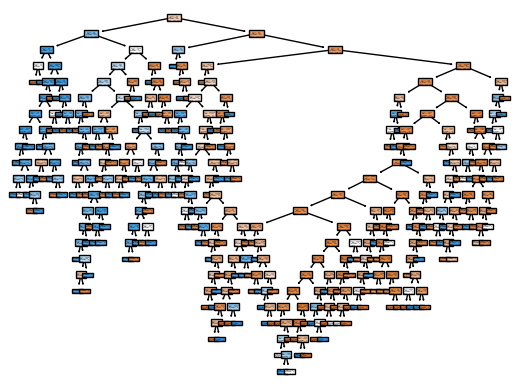

<Figure size 640x480 with 0 Axes>

In [ ]:
tree.plot_tree(model.fit(X, y), filled=True)
plt.show()
plt.savefig('tree.png')

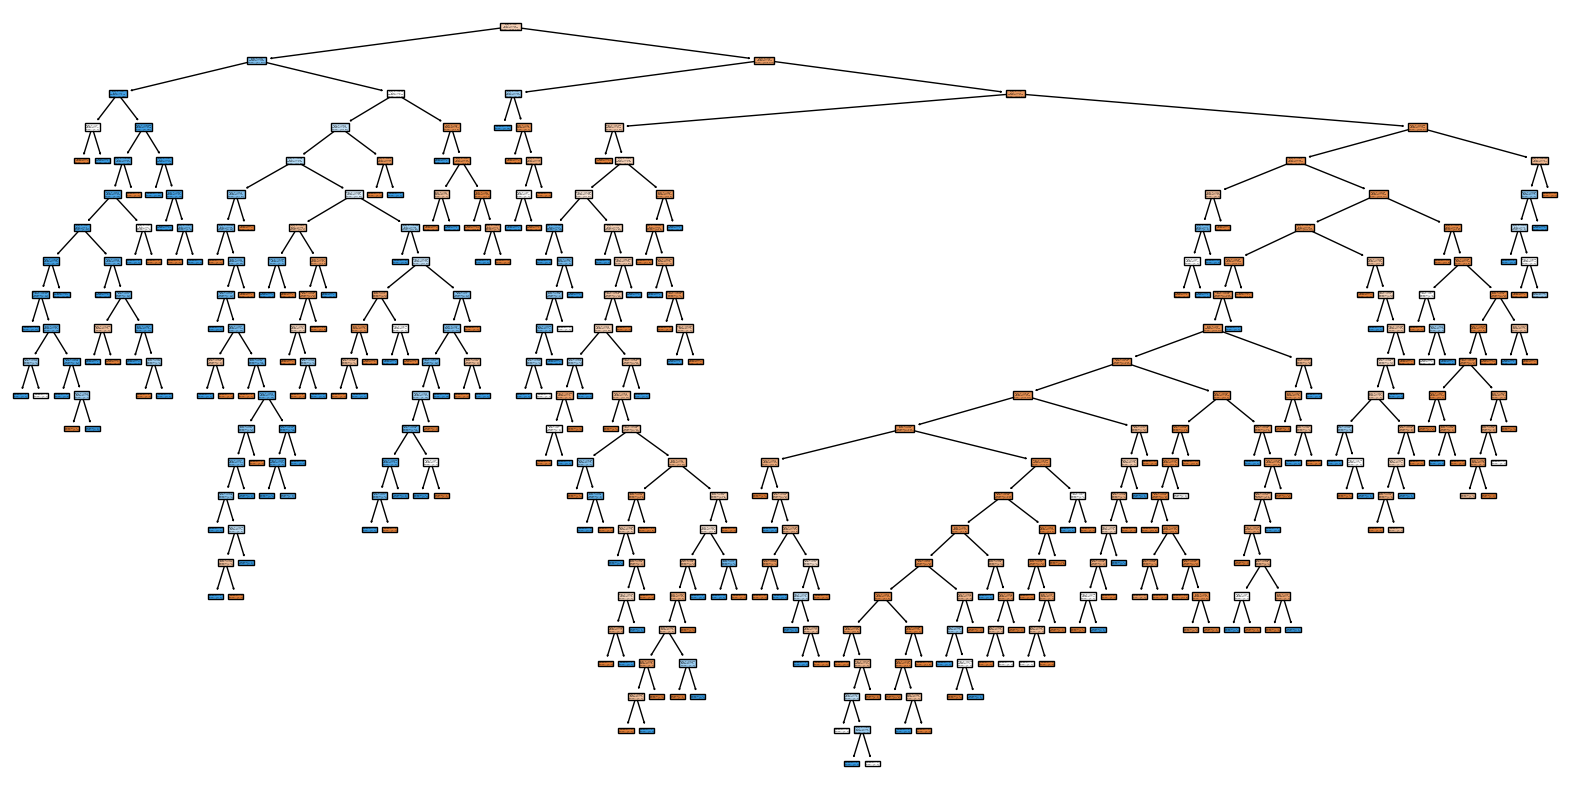

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(20,10))
tree.plot_tree(model.fit(X, y), filled=True)
plt.show()
plt.savefig('decision_tree.pdf', format='pdf', dpi=300)

In [ ]:
# jab humare pas model train ho jye toh usk metics kis tara sy nikly jety hain
# aur kon konse hoty h?
# pahela hota hain Precision Matrics
# Precision (kisi cheez ka precise hona, 
# ab ye karta kia, agar apki seri seri prediction postive hain,
# toh is nay us msy sy true positive batan hoty hain.)


In [ ]:
# Precision
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Precision : Precision measures the proportion of true positive predictions among all positive prediction

In [ ]:
precision_score(y_test, y_predict) 

0.7323943661971831

# Recall : Recall measures the proportion of true positive predictions among all actual positive instances.

In [ ]:
recall_score(y_test, y_predict)

0.7222222222222222

In [ ]:
f1_score(y_test, y_predict) #(hermonic Mean of recall_score and precision_score)

0.7272727272727272

In [ ]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_predict)
cm

array([[88, 19],
       [20, 52]], dtype=int64)

<Axes: >

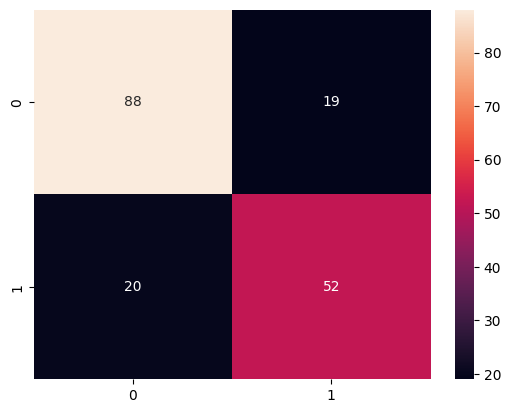

In [ ]:
sns.heatmap(cm, annot=True, fmt='d')

Text(0.5, 23.52222222222222, 'Predict lable')

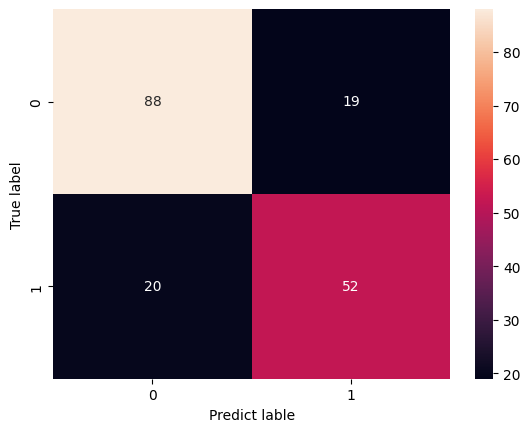

In [ ]:
sns.heatmap(cm, annot=True)
plt.ylabel('True label')
plt.xlabel('Predict lable')

# K Nearest Neighbour (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=2)
model.fit(X_train, y_tain)
y_predict = model.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
cm

array([[98,  9],
       [48, 24]], dtype=int64)

In [ ]:
precision_score(y_test, y_predict)

0.7272727272727273

In [ ]:
recall_score(y_test, y_predict)

0.3333333333333333

Text(0.5, 23.52222222222222, 'Predict lable')

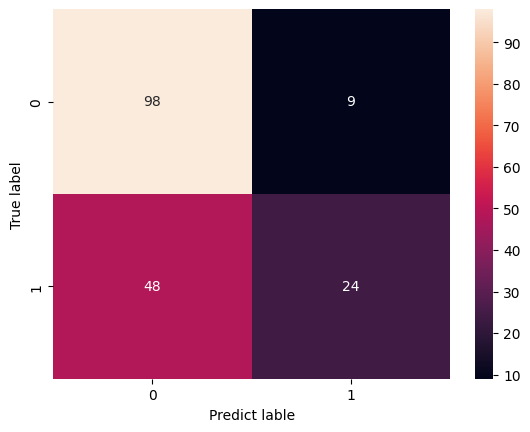

In [ ]:
sns.heatmap(cm, annot=True)
plt.ylabel('True label')
plt.xlabel('Predict lable')

# Random Forest () ## zadia trees ko ikhta krne ko inasmble bolty h 

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model= RandomForestClassifier()
model.fit(X_train, y_tain)
y_predict= model.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
print('Confusion Matrix: ',cm)
print('PrecisionScore: ', precision_score(y_test, y_predict))
print('Recall Score: ', recall_score(y_test, y_predict))
print('F1 Score: ', f1_score(y_test, y_predict))

Confusion Matrix:  [[94 13]
 [20 52]]
PrecisionScore:  0.8
Recall Score:  0.7222222222222222
F1 Score:  0.759124087591241


# logistic Regession (ye classification ka model h)

In [ ]:
from sklearn.linear_model import LogisticRegression

model= LogisticRegression()
model.fit(X_train, y_tain)
y_predict= model.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
print('Confusion Matrix: ',cm)
print('PrecisionScore: ', precision_score(y_test, y_predict))
print('Recall Score: ', recall_score(y_test, y_predict))
print('F1 Score: ', f1_score(y_test, y_predict))

Confusion Matrix:  [[94 13]
 [25 47]]
PrecisionScore:  0.7833333333333333
Recall Score:  0.6527777777777778
F1 Score:  0.7121212121212122


c:\Users\Abdul Hannan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# SVM (sport vestor machine)

In [ ]:
from sklearn.svm import SVC

model= SVC()
model.fit(X_train, y_tain)
y_predict= model.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
print('Confusion Matrix: ',cm)
print('PrecisionScore: ', precision_score(y_test, y_predict))
print('Recall Score: ', recall_score(y_test, y_predict))
print('F1 Score: ', f1_score(y_test, y_predict))

Confusion Matrix:  [[100   7]
 [ 50  22]]
PrecisionScore:  0.7586206896551724
Recall Score:  0.3055555555555556
F1 Score:  0.4356435643564357


# NAIVE Bayes
  

In [ ]:
from sklearn.naive_bayes import GaussianNB

model= GaussianNB()
model.fit(X_train, y_tain)
y_predict= model.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
print('Confusion Matrix: ',cm)
print('PrecisionScore: ', precision_score(y_test, y_predict))
print('Recall Score: ', recall_score(y_test, y_predict))
print('F1 Score: ', f1_score(y_test, y_predict))

Confusion Matrix:  [[92 16]
 [17 54]]
PrecisionScore:  0.7714285714285715
Recall Score:  0.7605633802816901
F1 Score:  0.7659574468085106


In [15]:
# Libraries and model import 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# define model to be evaulate 
models = [LogisticRegression(), KNeighborsClassifier(), RandomForestClassifier(), SVC()]
names= ['Logistic Regression', 'KNN', 'Random Forest Classifier', 'SVM']


# perform k-fold cross-velidation for each model
k = 10
for name, model in zip(names, models): 
    cv_scores = cross_val_score(model, X_train, y_tain,  cv= k)
    print(f'{name} CV accuracy: {np.mean(cv_scores):.3f} +/-{np.std(cv_scores):.3f}')

c:\Users\Abdul Hannan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Abdul Hannan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

Logistic Regression CV accuracy: 0.789 +/-0.040
KNN CV accuracy: 0.730 +/-0.047
Random Forest Classifier CV accuracy: 0.810 +/-0.053
SVM CV accuracy: 0.669 +/-0.031


In [16]:
from sklearn.model_selection import GridSearchCV

#define the parameter gird
param_gird = {'C', [0.1, 1, 10], 
              'kernel': ['linear','rbf'], 
              'gamma': [0.1, 1, 10]}
gird_serach = GridSearchCV(SVC(), param_grid, cv=5)
gird_serach.fit(X_train, y_train) 

print("Best parameters:{} ". format(gird_serach.best_params_))
print("Best cross-velidation score :{:.2f}".format(gird_serach.best_score_))

SyntaxError: invalid syntax (625149281.py, line 5)